In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Defining Helper Functions
AUDIO_PATH = '/kaggle/input/savee-database/AudioData'

emotion_map = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise'
}

stress_map = {
    'anger': 'stressed',
    'disgust': 'stressed',
    'fear': 'stressed',
    'sadness': 'stressed',
    'neutral': 'not_stressed',
    'happiness': 'not_stressed',
    'surprise': 'not_stressed'
}

def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)


In [3]:
# Load Data & Extract Features
data = []
labels = []
stress_labels = []

for speaker_folder in os.listdir(AUDIO_PATH):
    speaker_path = os.path.join(AUDIO_PATH, speaker_folder)
    if not os.path.isdir(speaker_path): 
        continue
    for file in os.listdir(speaker_path):
        if file.endswith('.wav'):
            emotion_code = file[:2] if file[:2] in emotion_map else file[0]
            emotion = emotion_map.get(emotion_code)
            stress = stress_map.get(emotion)

            feature_vector = extract_features(os.path.join(speaker_path, file))
            data.append(feature_vector)
            labels.append(emotion)
            stress_labels.append(stress)

X = np.array(data)
y_emotion = np.array(labels)
y_stress = np.array(stress_labels)

In [4]:
# Model Training (Stress Classification)
le = LabelEncoder()
y = le.fit_transform(y_stress)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

not_stressed       0.73      0.74      0.74        47
    stressed       0.75      0.73      0.74        49

    accuracy                           0.74        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.74      0.74      0.74        96



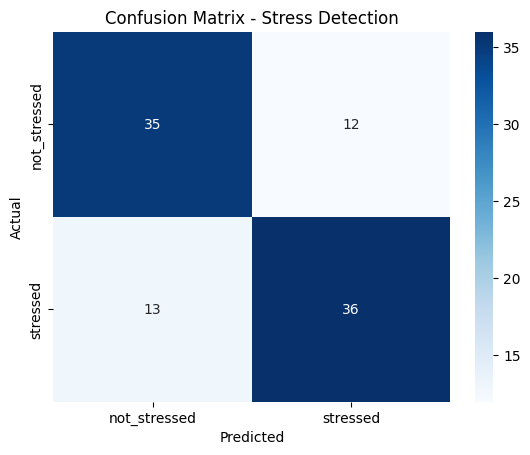

In [5]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Stress Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

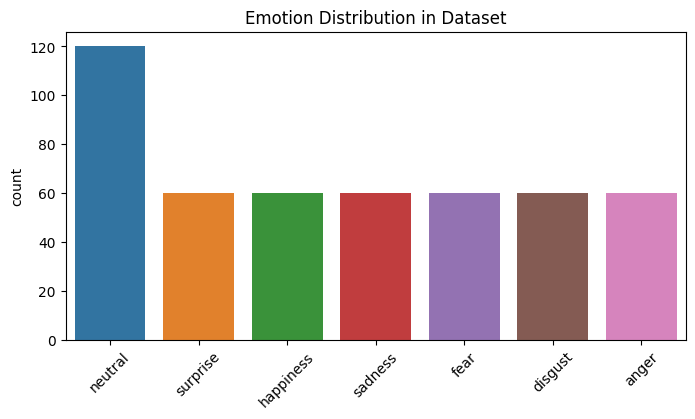

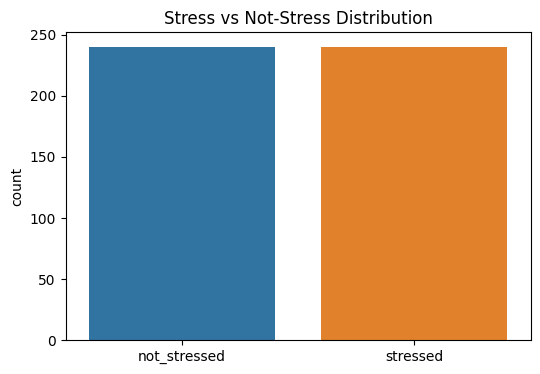

In [6]:
# Emotion distribution plot
plt.figure(figsize=(8, 4))
sns.countplot(x=y_emotion)
plt.title("Emotion Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()

# Stress label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_stress)
plt.title("Stress vs Not-Stress Distribution")
plt.show()